# Is this winter in Berlin gonna freeze our nadgers off?

I moved to Berlin in March 2014, after visiting the city in December 2013, to see if I liked it.

I clearly did, because it's now my new home.

One thing I was expecting though was for the winters to be epic, snow filled seasons that warranted the Stark warning:

> Winter is coming.

December in 2014 felt pretty mild, and November is still feeling relatively warm, so I now wonder if I've misled about Berlin's winters.

### Lets solve this with science!

If I look through the data on [Weather Underground][1] over the last few years, I can hope I can see how 2013 and 2014 compared to previous years.

This won't tell me if the rest of this winter is going to be cold, but it _will_ give me an idea if my experience of Berlin's winters is typical for the city.


[1]: http://wunderground.com/



## First, lets get our data

I've downloaded the last 5 years of data from Weather Underground [here], geting the csv file at the bottom.

It's in this directory at `Berlin_2010_2015.csv`.

So, let's fire up pandas, and load it in:

[1]: http://www.wunderground.com/history/airport/EDDT/2010/1/1/CustomHistory.html?dayend=2&monthend=2&yearend=2014&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=




In [1]:
from pandas import *

In [8]:
weather = read_csv('Berlin_2010_2015.csv')

In [9]:
weather['CET'] = to_datetime(weather['CET'])

In [10]:
weather.dtypes

CET                            datetime64[ns]
Max TemperatureC                        int64
Mean TemperatureC                       int64
Min TemperatureC                        int64
Dew PointC                              int64
MeanDew PointC                          int64
Min DewpointC                           int64
Max Humidity                            int64
 Mean Humidity                          int64
 Min Humidity                           int64
 Max Sea Level PressurehPa              int64
 Mean Sea Level PressurehPa             int64
 Min Sea Level PressurehPa              int64
 Max VisibilityKm                     float64
 Mean VisibilityKm                    float64
 Min VisibilitykM                     float64
 Max Wind SpeedKm/h                     int64
 Mean Wind SpeedKm/h                    int64
 Max Gust SpeedKm/h                   float64
Precipitationmm                       float64
 CloudCover                           float64
 Events                           

### Huh? It looks like Wunderground doesn't like giving us 5 years of data in one go

Our import has less than 2 years worth of data


In [14]:
weather['CET'].min(), weather['CET'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2011-02-02 00:00:00'))

In fact, we can work out this out in more detail, like so

In [16]:
weather['CET'].max() - weather['CET'].min()

Timedelta('397 days 00:00:00')

### 397 days? Huh.

This isn't ideal, but it's enough to us to start putting some charts together. We can work out how to increase the range later.

Time to import matplotlib.

In [17]:
%matplotlib inline

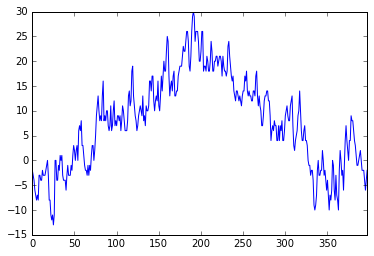

In [18]:
weather['Mean TemperatureC'].plot()

Hmm… that doens't look right. Let's give this a time axis, and try again.

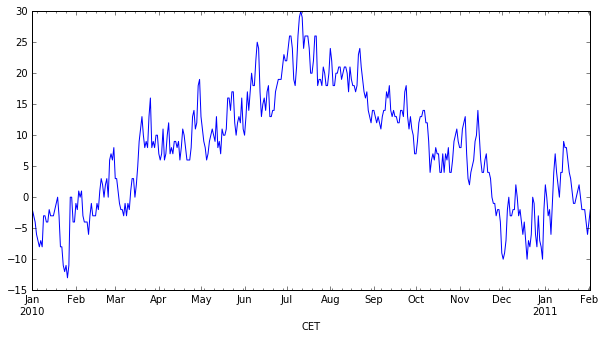

In [25]:
weather.index = weather['CET']
weather['Mean TemperatureC'].plot(figsize=(10, 5))

### So, in 2010-2011 at least, November is pretty mild too, but December and Jan are chillier

If I had more time ,I'd look through the other years, but in the face of patchy data from Wunderground, I think I'll try looking at the year I _did_ live in Berlin, to see how it compares.

In [34]:
weather_in_2013 = read_csv('Berlin_2013_2014.csv')

In [35]:
weather_in_2013

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2013-1-1,8,7,5,6,3,2,100,78,62,...,31,14,10,26,18,NaN,0.76,6,Rain,216<br />
1,2013-1-2,6,4,3,4,3,1,93,86,73,...,31,15,10,29,19,NaN,0.51,6,Rain,255<br />
2,2013-1-3,10,7,4,9,6,2,100,89,72,...,26,9,4,34,24,48,0.51,7,Rain,258<br />
3,2013-1-4,9,8,6,9,7,4,100,89,73,...,31,10,3,29,23,50,6.10,6,Rain,283<br />
4,2013-1-5,7,6,5,8,6,4,100,93,83,...,26,11,5,18,11,NaN,0.00,7,Rain,321<br />
5,2013-1-6,7,6,5,7,6,5,100,98,87,...,19,6,2,21,10,NaN,1.02,7,Rain,299<br />
6,2013-1-7,7,4,3,7,3,2,100,93,84,...,11,9,3,14,8,NaN,0.00,7,Rain,110<br />
7,2013-1-8,7,4,2,7,5,2,100,99,93,...,10,4,1,14,8,NaN,3.05,7,Rain,252<br />
8,2013-1-9,7,7,6,7,7,4,100,97,87,...,10,4,0,24,10,NaN,3.05,7,Fog-Rain,233<br />
9,2013-1-10,5,2,-1,4,2,-4,100,90,72,...,31,12,6,29,18,NaN,2.03,6,Rain-Snow,303<br />


In [38]:
weather_in_2013['CET'] = to_datetime(weather_in_2013['CET'])
weather_in_2013.index = weather_in_2013['CET']

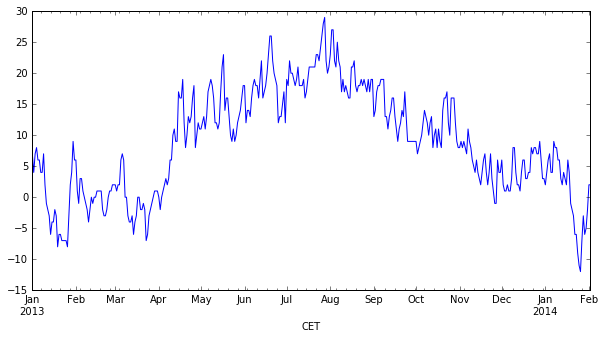

In [39]:
weather_in_2013['Mean TemperatureC'].plot(figsize=(10,5))

## What does this tell me?

Okay, it looks like the Winter in 2013 _was_ indeed warmer than 2010.

Okay, lets do a final check for 2014.

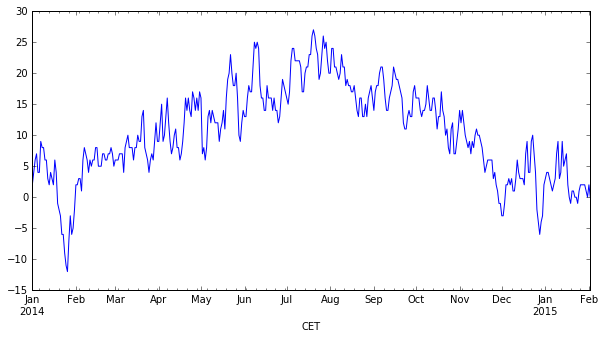

In [40]:
weather_in_2014 = read_csv('Berlin_2014_2015.csv')
weather_in_2014['CET'] = to_datetime(weather_in_2014['CET'])
weather_in_2014.index = weather_in_2014['CET']
weather_in_2014['Mean TemperatureC'].plot(figsize=(10,5))

## Wow, apart from that blip at the end of Jan, it looks like it was WAAAAY warmer

So now we have a slightly better idea. 

#### TODO if I come back to this:

- work out how combine the dataframes into a single massive one.
- strip out the non winter months
- look at other ways to graph this
